# Advanced Python for Data Analytics - Final Project
In this final project, you will put together everything you have learned about working with data using Python.

Specifically, in this project you will:
1. Use Jupyter Lab, writing code and Markdown in a Jupyter Notebook file.
2. Use Pandas to manipulate data.
3. Import data into a dataframe using SQLAlchemy.
4. Extract text patterns using regular expressions.
5. Create visualizations using matplotlib.

## About the data
This analysis uses the InvoiceLines table from the Sales schema of the WideWorldImporters database. You do not need any other tables or data to complete this project.

#### Import the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sal
from sqlalchemy import create_engine

pd.set_option('display.max_columns', None)

#### Database settings

In [2]:
config = {
    "driver": "SQL SERVER",
    "server": "LT-W1828-HH\SQLSERVER2019",
    "database": "WideWorldImporters",
    "username": "sandbox",
    "password": "password"
}

##### Create the SQLAlchemy engine (the database connection)

In [3]:
engine = create_engine(f"mssql+pyodbc:///?odbc_connect=DRIVER={{{config['driver']}}};SERVER={config['server']};DATABASE={config['database']};UID={config['username']};PWD={config['password']}")

In [4]:
query = """
    SELECT *
    FROM WideWorldImporters.Sales.InvoiceLines
"""

Use the `.read_sql()` method from Pandas to import the data directly from the SQL Server database into a dataframe object.

In [5]:
invoiceLines = pd.read_sql(query, engine)
invoiceLines.LastEditedWhen = pd.to_datetime(invoiceLines["LastEditedWhen"])

## Questions: Invoice Lines

#### General Questions (14 points)

1. Which are the top 5 most frequently sold products (ie. count of times the product was ordered regardless of the quantity) in **2014**? Include the description of the product.
2. Which 5 products produced the largest profit in 2014? 
3. Which products are the most profitable on average (ie. highest ratio of profit to sale price after grouping by StockItemID)? You can calculate profit ratio by dividing the profit by the quantity * unit price.by dividing the profit by the quantity * unit price.
4. How many 'white' products were sold in 2014?
5. What is the average unit price for products with "toy" in the description?
6. The tax rate should be expressed as a percentage (ie. between 0 and 1). Modify it to reflect this.
7. Create a scatter plot that plots each line item by its LineProfit and ExtendedPrice. Only show items that did not make a profit.

#### Quantity of quantities comparison (12 points)

8. Grouping each order together, count up the total quantity per order. Then, group by the total quantity per order, counting how many orders have each total quantity.
9. Turn this aggregated data set into a histogram that compares the most frequent order quantities.

#### Slippers color and size comparison (16 points)

10. Extract a subset of the invoice lines dataframe where "slippers" is contained in the description. Add a new column to this subset called "Color" that indicates the color of the slippers. Add another column called "Size" that indicates its size.
11. Which colors of slippers are most frequently purchased? Which sizes of slippers are most frequently purchased?

#### Hoodies, slippers, and jackets comparison (20 points)

12. Get a subset of the data that includes only hoodies, slippers, and jackets. Add two columns to this subset dataframe, "Year" and "Month" which contain the appropriate data.
13. Plot three lines `hoodies`, `slippers`, and `jackets` to compare their **total sales** (Quantity * UnitPrice) per month over the life of the company.
14. Follow the same steps as before to compare the **average** sales per month between hoodies, slippers, and jackets.

#### Bubble wrap widths comparison (38 points)

15. Create a box plot that compares LineProfit among different bubble wrap widths.

----

#### General Questions (14 points)

##### 1. Which are the top 5 most frequently sold products (ie. count of times the product was ordered regardless of the quantity) in **2014**? Include the description of the product.

In [6]:
topFiveProductsByFrequency = invoiceLines.loc[ invoiceLines["LastEditedWhen"].dt.to_period("Y") == "2014"].groupby(["StockItemID", "Description"]).agg({"Quantity": "count"}).sort_values(by="Quantity", ascending=False).iloc[0:5]
topFiveProductsByFrequency

,,Quantity
StockItemID,Description,
28,DBA joke mug - two types of DBAs (White),367
165,10 mm Anti static bubble wrap (Blue) 10m,364
13,USB food flash drive - shrimp cocktail,349
67,Ride on toy sedan car (Black) 1/12 scale,344
209,Packing knife with metal insert blade (Yellow) 9mm,344


##### 2. Which 5 products produced the largest profit in 2014? 

In [7]:
invoiceLines.loc[invoiceLines["LastEditedWhen"].dt.to_period('Y') == '2014'].groupby(["StockItemID", "Description"]).agg({"LineProfit": "sum"}).sort_values(by="LineProfit", ascending=False).iloc[0:5]

,,LineProfit
StockItemID,Description,
161,20 mm Double sided bubble wrap 50m,1467400.0
215,Air cushion machine (Blue),1281951.0
173,32 mm Anti static bubble wrap (Blue) 50m,1041100.0
167,10 mm Anti static bubble wrap (Blue) 50m,984960.0
164,32 mm Double sided bubble wrap 50m,911070.0


##### 3. Which products are the most profitable on average (ie. highest ratio of profit to sale price after grouping by StockItemID)? You can calculate profit ratio by dividing the profit by the quantity * unit price after grouping by StockItemID.

In [8]:
groupByStockItemID = invoiceLines.groupby(["StockItemID", "Description"]).agg({"Quantity": "sum", "UnitPrice": 'mean', 'LineProfit':'sum'})
groupByStockItemID['ProfitRatio'] = groupByStockItemID['LineProfit'] / (groupByStockItemID['Quantity'] * groupByStockItemID['UnitPrice'])
groupByStockItemID.sort_values(by="ProfitRatio", ascending=False).iloc[0:5]

,,Quantity,UnitPrice,LineProfit,ProfitRatio
StockItemID,Description,,,,
161,20 mm Double sided bubble wrap 50m,57540,108.0,5293680.0,0.851852
118,Dinosaur battery-powered slippers (Green) S,5843,32.0,140232.0,0.750000
127,Plush shark slippers (Gray) M,5702,32.0,136848.0,0.750000
136,Animal with big feet slippers (Brown) L,5785,32.0,138840.0,0.750000
135,Animal with big feet slippers (Brown) M,5625,32.0,135000.0,0.750000


##### 4. How many 'white' products were sold in 2014?

In [9]:
invoiceLines.loc[ (invoiceLines['Description'].str.contains("white", case=False)) & (invoiceLines['LastEditedWhen'].dt.to_period('Y') == '2014'), "Quantity" ].sum()

490349

##### 5. What is the average unit price for products with "toy" in the description?

In [10]:
invoiceLines.loc[ invoiceLines['Description'].str.contains(" toy", case=False), "UnitPrice"].mean()

135.27036662903322

##### 6. The tax rate should be expressed as a percentage (ie. between 0 and 1). Modify it to reflect this.

In [11]:
invoiceLines['TaxRate'] = invoiceLines['TaxRate'] / 100

##### 7. Create a scatter plot that plots each line item by its LineProfit and ExtendedPrice. Only show items that did not make a profit.

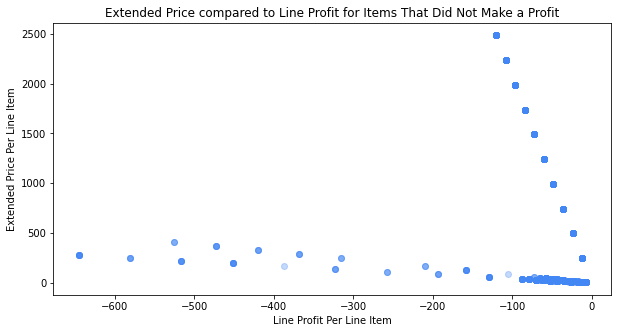

In [12]:
unprofitableItems = invoiceLines.loc[ invoiceLines['LineProfit'] < 0 ]
plt.figure(figsize=(10,5))
plt.scatter(unprofitableItems['LineProfit'], unprofitableItems['ExtendedPrice'], c="#4387f450")
plt.xlabel("Line Profit Per Line Item")
plt.ylabel("Extended Price Per Line Item")
plt.title("Extended Price compared to Line Profit for Items That Did Not Make a Profit")
plt.show()


#### Quantity of quantities comparison (12 points)

##### 8. Grouping each order together, count up the total quantity per order. Then, group by the total quantity per order, counting how many orders have that total quantity.

In [13]:
totalPerInvoice = invoiceLines.groupby("InvoiceID", as_index=False).agg({'Quantity':'sum'})

##### 9. Plot the order amounts on a histogram.

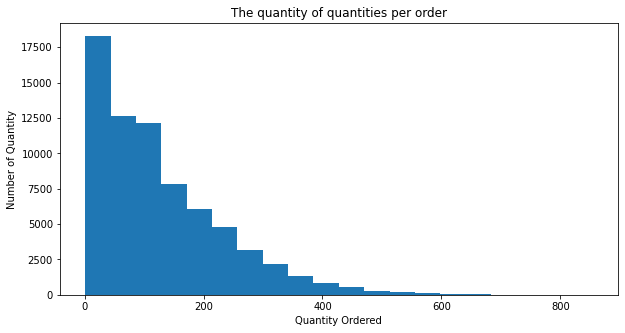

In [14]:
plt.figure(figsize=(10,5))
plt.title("The quantity of quantities per order")
plt.ylabel("Number of Quantity")
plt.xlabel("Quantity Ordered")
plt.hist(totalPerInvoice['Quantity'], bins=20)
plt.show()

#### Slippers color and size coparison ( 16 points)

##### 10. Extract a subset of the invoice lines dataframe where "slippers" is contained in the description. Add a new column to this subset called "Color" that indicates the color of the slippers. Add another column called "Size" that indicates its size.
You should use regular expressions to extract this information from the dataframe. The regex patterns for doing this are provided to you below:

Extract the color: `(?<= \()(.*)(?=\))`

Extract the size: `(?<=\) )(XXS|XS|S|M|L|XL|XXL|XXXL)*`

In [15]:
pd.options.mode.chained_assignment = None  # default='warn'

slippers = invoiceLines.loc[ invoiceLines['Description'].str.contains("slippers", case=False)]
slippers['Color'] = slippers.loc[:,'Description'].str.extract(r'(?<= \()(.*)(?=\))', expand=False)
slippers['Size'] = slippers.loc[:,'Description'].str.extract(r'(?<=\) )(XXS|XS|S|M|L|XL|XXL|XXXL)*', expand=False)

##### 11. Which colors of slippers are most frequently purchased? Which sizes of slippers are most frequently purchased?

In [16]:
slippers.groupby("Color").agg({'Quantity': 'sum'}).sort_values(by="Quantity", ascending=False)

,Quantity
Color,
Green,47639
Black,23339
Brown,23112
Gray,22771


In [17]:
slippers.groupby("Size").agg({'Quantity': 'sum'}).sort_values(by="Quantity", ascending=False)

,Quantity
Size,
XL,29483
L,29395
M,29098
S,28885


#### Hoodies, slippers, and jackets comparison (20 points)

##### 12. Get a subset of the data that includes only hoodies, slippers, and jackets. Add two columns to this subset dataframe, "Year" and "Month" which contain the appropriate data.

In [18]:
# Filter the data
filt = ( invoiceLines['Description'].str.contains("hoodie", case=False) ) | ( invoiceLines['Description'].str.contains("slipper") ) | ( invoiceLines['Description'].str.contains("jacket") )
hsj = invoiceLines.loc[filt]

# Add month and year columns
hsj['Year'] = hsj['LastEditedWhen'].dt.to_period('Y')
hsj['Month'] = hsj['LastEditedWhen'].dt.to_period('M')

hsj['Sales'] = hsj['Quantity'] * hsj['UnitPrice']
hsj['ProductType'] = hsj['Description'].str.extract(r'(jacket|slipper|hoodie)', expand=False)
totalSalesHsj = hsj.groupby(['ProductType', 'Month'], as_index=False).agg({'Sales': 'sum'})

##### 13. Plot three lines `hoodies`, `slippers`, and `jackets` to compare their **total sales** (Quantity * UnitPrice) per month over the life of the company.

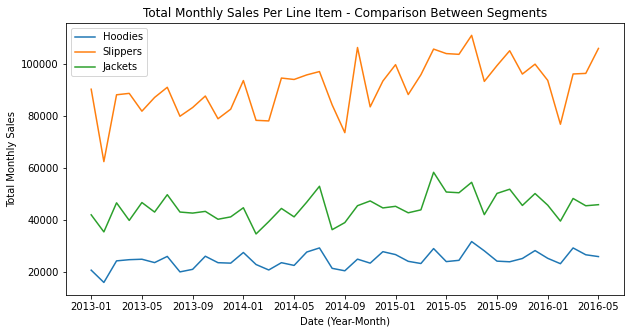

In [19]:
plt.figure(figsize=(10,5))

h = totalSalesHsj.loc[ totalSalesHsj['ProductType']=='hoodie' ]
s = totalSalesHsj.loc[ totalSalesHsj['ProductType']=='slipper' ]
j = totalSalesHsj.loc[ totalSalesHsj['ProductType']=='jacket' ]

get_every_nth_label = 4
x_labels = totalSalesHsj.Month.unique()[::get_every_nth_label]
all_x_indexes = [i for i in range(len(totalSalesHsj['Month'].unique())) ]
x_indexes = [(i*get_every_nth_label) for i in range(len(x_labels)) ]

plt.plot(all_x_indexes, 'Sales', data=h, label='Hoodies')
plt.plot(all_x_indexes, 'Sales', data=s, label='Slippers')
plt.plot(all_x_indexes, 'Sales', data=j, label='Jackets')
plt.legend()

plt.title("Total Monthly Sales Per Line Item - Comparison Between Segments")
plt.ylabel("Total Monthly Sales")
plt.xlabel("Date (Year-Month)")

plt.xticks(x_indexes, x_labels)

plt.show()

##### 14. Follow the same steps as before to compare the **average** sales per month between hoodies, slippers, and jackets.

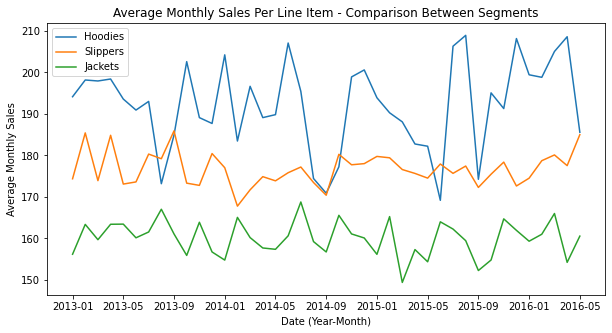

In [20]:
averageHsj = hsj.groupby(['ProductType', 'Month'], as_index=False).agg({'Sales': 'mean'})
averageHsj

plt.figure(figsize=(10,5))

h = averageHsj.loc[ averageHsj['ProductType']=='hoodie' ]
s = averageHsj.loc[ averageHsj['ProductType']=='slipper' ]
j = averageHsj.loc[ averageHsj['ProductType']=='jacket' ]

get_every_nth_label = 4
x_labels = averageHsj.Month.unique()[::get_every_nth_label]
all_x_indexes = [i for i in range(len(averageHsj['Month'].unique())) ]
x_indexes = [(i*get_every_nth_label) for i in range(len(x_labels)) ]

plt.plot(all_x_indexes, 'Sales', data=h, label='Hoodies')
plt.plot(all_x_indexes, 'Sales', data=s, label='Slippers')
plt.plot(all_x_indexes, 'Sales', data=j, label='Jackets')
plt.legend()

plt.xticks(x_indexes, x_labels)

plt.title("Average Monthly Sales Per Line Item - Comparison Between Segments")
plt.ylabel("Average Monthly Sales")
plt.xlabel("Date (Year-Month)")

plt.show()

#### Bubble wrap widths comparison (38 points)

##### 15. Create a box plot that compares LineProfit among different bubble wrap widths.

In [21]:
bubble = invoiceLines.loc[ (invoiceLines['Description'].str.contains('([0-9])+( [m]{2})')) & (invoiceLines['Description'].str.contains('bubble')) ]
bubble['BubbleWidth'] = bubble['Description'].str.extract('([0-9]+ [m]{2})', expand=False)

C:\Users\HaydenH\AppData\Local\Temp\ipykernel_25668\198163451.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bubble = invoiceLines.loc[ (invoiceLines['Description'].str.contains('([0-9])+( [m]{2})')) & (invoiceLines['Description'].str.contains('bubble')) ]


In [22]:
bubble.BubbleWidth.unique()

array(['10 mm', '32 mm', '20 mm'], dtype=object)

In [23]:
bubble10 = bubble.loc[ bubble['BubbleWidth'].str.contains('10') ]['LineProfit']
bubble32 = bubble.loc[ bubble['BubbleWidth'].str.contains('32') ]['LineProfit']
bubble20 = bubble.loc[ bubble['BubbleWidth'].str.contains('20') ]['LineProfit']

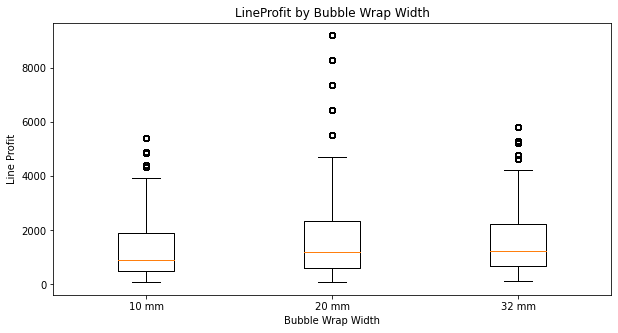

In [24]:
plt.figure(figsize=(10,5))
plt.title('LineProfit by Bubble Wrap Width')
plt.ylabel('Line Profit')
plt.xlabel('Bubble Wrap Width')
plt.boxplot([bubble10, bubble20, bubble32], labels=['10 mm', '20 mm', '32 mm'])
plt.show()